In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import yaml

In [2]:
def read_csv(filepath, separator, column_names):
    features = pd.read_csv(filepath, sep=separator, names = column_names)
    return features



df = read_csv("../resources/ejemplo.csv", ",", ["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship",
                "race","sex","capital-gain","capital-loss", "hours-per-week", "native-country", "target"])

df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Clean up the data.

We see that there are several column with ? values, lets replace by nan and remove nan rows

In [3]:
df.drop("education-num", axis=1, inplace=True)

In [4]:
#replace ? by null
import numpy as np
#replace ? by nan
df.replace(' ?', np.nan, inplace = True)

df.dropna(how ='any',inplace=True)


The data set contains Numerical and categorical data.
Lets transform the categorical data into labes and then use Random Forest

In [5]:

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'sex', 'native-country', 'target'] 
labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    print(col)
    print(" values :" + str(le_name_mapping) + "\n")
    

workclass
 values :{' Federal-gov': 0, ' Local-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 4, ' State-gov': 5, ' Without-pay': 6}

race
 values :{' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}

education
 values :{' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}

marital-status
 values :{' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}

occupation
 values :{' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-supp

**TODO:
  Show each value with its category

In [6]:
#df.shape

**Investigate random forest tunning

***Evaluate: Nstimators value

In [7]:
#NSTIMATORS
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
X = df.values[:, 0:13]
Y = df.values[:,13]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results_roc = []
test_results_roc = []
accuracy_result = []
precission_result=[]

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, class_weight="balanced")
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results_roc.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results_roc.append(roc_auc)
   accuracy_result.append( accuracy_score(y_test,y_pred)*100)
   precission_result.append(metrics.classification_report(y_test,y_pred))


 

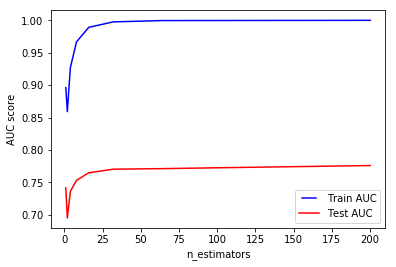

In [8]:
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results_roc, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results_roc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

Tendency from 32 stimators onwars the auc decrease. Best choice 32


In [9]:
print("ROC AUC:" , train_results_roc[5])
print("ROC auc_test", test_results_roc[5])

ROC AUC: 0.997611972421515
ROC auc_test 0.7703484105378887


**INvestigate max_depth



[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


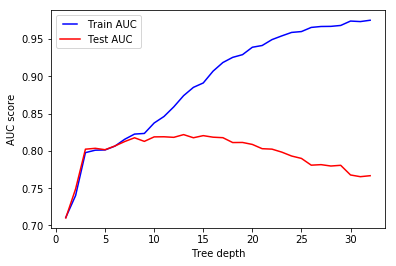

In [10]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
score_ls = []
score_std_ls = []
y_predicts =[]
train_predicts = []
print(max_depths)
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=10,max_depth=max_depth, n_jobs=-1, class_weight="balanced")
   rf.fit(x_train, y_train)
    
   train_pred = rf.predict(x_train)
   train_predicts.append(train_pred)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   y_predicts.append(y_pred)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
               
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

 From max_depths 13 onwards the model underfit

In [11]:
print("ROC AUC:" , train_results[13])
print("ROC auc_test", test_results[13])

    

ROC AUC: 0.8852115538316863
ROC auc_test 0.8176321505486522


In [12]:
[]

[]

# Investigate with the default Random forest valuesHHH

Lest investigate if our tune improves with our tune

In [13]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(x_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [14]:

train_pred = rf.predict(x_train)
   
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
y_pred = rf.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(false_positive_rate, true_positive_rate)




In [15]:
print("ROC AUC:" , roc_auc)
print("ROC auc_test", roc_auc_test )
print("Accuracy :", accuracy_score(y_test,y_pred)*100)
print("Precision:",classification_report(y_test,y_pred))

ROC AUC: 0.9776893413905312
ROC auc_test 0.7596852553930569
Accuracy : 84.68372894841532
Precision:               precision    recall  f1-score   support

           0       0.87      0.94      0.90      5610
           1       0.76      0.58      0.66      1931

   micro avg       0.85      0.85      0.85      7541
   macro avg       0.82      0.76      0.78      7541
weighted avg       0.84      0.85      0.84      7541



The best auc, compared is the one with  From max_depths 7 onwards the model underfit


In [22]:
rf = RandomForestClassifier(n_estimators=10,max_depth=13, n_jobs=-1, class_weight="balanced")
rf.fit(x_train, y_train)
    
train_pred = rf.predict(x_train)
 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

y_pred = rf.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


print("ROC AUC:" , roc_auc)
print("ROC auc_test", roc_auc_test )
print("Accuracy :", accuracy_score(y_test,y_pred)*100)
print("Precision:",classification_report(y_test,y_pred))

scores = cross_val_score(rf, x_train,       
    y_train, cv=3, scoring='roc_auc') 

print("Mean: " + str(np.mean(scores)))
print("Std: " + str(np.std(scores)))





ROC AUC: 0.8185542942754993
ROC auc_test 0.7596852553930569
Accuracy : 81.31547540114043
Precision:               precision    recall  f1-score   support

           0       0.93      0.81      0.87      5610
           1       0.60      0.83      0.69      1931

   micro avg       0.81      0.81      0.81      7541
   macro avg       0.76      0.82      0.78      7541
weighted avg       0.85      0.81      0.82      7541

Mean: 0.9031117037014974
Std: 0.0036015583676177743
[0.90225264 0.89919344 0.90788903]
